<a href="https://colab.research.google.com/github/nonyeezeh/Research-Project-Code/blob/main/code_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code 1

### Bayesian Network Data Creation

##### The following code makes use of forward sampling to generate data from a bayesian network. There are only 3 variables (interest rates, economic indicators, and stock prices) and no noise added.

In [ ]:
import numpy as np
import pandas as pd

# Define the number of samples
num_samples = 1000

# Define the probability distributions
def sample_A():
    # Example distribution for interest rates
    return np.random.choice(['low', 'medium', 'high'], p=[0.3, 0.4, 0.3])

def sample_B(A):
    # Example conditional distributions for economic indicators given interest rates
    if A == 'low':
        return np.random.choice(['bad', 'average', 'good'], p=[0.5, 0.3, 0.2])
    elif A == 'medium':
        return np.random.choice(['bad', 'average', 'good'], p=[0.2, 0.5, 0.3])
    else:  # A == 'high'
        return np.random.choice(['bad', 'average', 'good'], p=[0.1, 0.3, 0.6])

def sample_C(A, B):
    # Example conditional distributions for stock prices given interest rates and economic indicators
    if A == 'low' and B == 'bad':
        return np.random.choice(['decrease', 'stable', 'increase'], p=[0.7, 0.2, 0.1])
    elif A == 'low' and B == 'average':
        return np.random.choice(['decrease', 'stable', 'increase'], p=[0.5, 0.3, 0.2])
    elif A == 'low' and B == 'good':
        return np.random.choice(['decrease', 'stable', 'increase'], p=[0.4, 0.4, 0.2])
    elif A == 'medium' and B == 'bad':
        return np.random.choice(['decrease', 'stable', 'increase'], p=[0.5, 0.4, 0.1])
    elif A == 'medium' and B == 'average':
        return np.random.choice(['decrease', 'stable', 'increase'], p=[0.3, 0.5, 0.2])
    elif A == 'medium' and B == 'good':
        return np.random.choice(['decrease', 'stable', 'increase'], p=[0.2, 0.5, 0.3])
    elif A == 'high' and B == 'bad':
        return np.random.choice(['decrease', 'stable', 'increase'], p=[0.3, 0.5, 0.2])
    elif A == 'high' and B == 'average':
        return np.random.choice(['decrease', 'stable', 'increase'], p=[0.2, 0.4, 0.4])
    else:  # A == 'high' and B == 'good'
        return np.random.choice(['decrease', 'stable', 'increase'], p=[0.1, 0.3, 0.6])

# Generate samples
data = []

for _ in range(num_samples):
    A = sample_A()
    B = sample_B(A)
    C = sample_C(A, B)
    data.append((A, B, C))

# Convert to a pandas DataFrame
df = pd.DataFrame(data, columns=['Interest Rates', 'Economic Indicators', 'Stock Prices'])

# Save to a CSV file
df.to_csv('bayesian_network_data.csv', index=False)

print(df.head(10))  # Print first 10 samples to verify

  Interest Rates Economic Indicators Stock Prices
0         medium             average       stable
1            low             average     decrease
2           high             average       stable
3            low                 bad     increase
4            low                 bad     decrease
5           high                good     increase
6           high             average       stable
7         medium             average       stable
8           high             average       stable
9         medium                good     decrease


### Neural Network Training

##### NN with predictions

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('bayesian_network_data.csv')

# One-hot encode categorical variables
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(df[['Interest Rates', 'Economic Indicators']])
encoded_labels = encoder.fit_transform(df[['Stock Prices']])

# Define the neural network
model = Sequential([
    Dense(10, input_shape=(encoded_features.shape[1],), activation='relu'),
    Dense(10, activation='relu'),
    Dense(encoded_labels.shape[1], activation='softmax')  # Output layer with softmax activation for classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(encoded_features, encoded_labels, epochs=50, batch_size=32, validation_split=0.2)

# Make predictions on the entire dataset
predictions = model.predict(encoded_features)

# Convert predictions from probabilities to class labels
predicted_classes = encoder.inverse_transform(predictions)

# Convert true labels from one-hot encoded format to class labels
true_classes = encoder.inverse_transform(encoded_labels)

# Print a few examples of predictions and true labels
for i in range(10):
    print(f"Predicted: {predicted_classes[i]}, True: {true_classes[i]}")

# Convert predicted_classes to a suitable format for DataFrame
predicted_classes_series = pd.Series([pred[0] for pred in predicted_classes], name='Predicted Stock Prices')

# Optionally, save predictions to a new CSV file
output_df = df.copy()
output_df['Predicted Stock Prices'] = predicted_classes_series
output_df.to_csv('predicted_bayesian_network_data.csv', index=False)

print("Predictions saved to 'predicted_bayesian_network_data.csv'")

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


25/25 [==============================] - 1s 10ms/step - loss: 1.1647 - accuracy: 0.2400 - val_loss: 1.1547 - val_accuracy: 0.2050
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 1.1221 - accuracy: 0.3525 - val_loss: 1.1082 - val_accuracy: 0.3250
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 1.0931 - accuracy: 0.3988 - val_loss: 1.0751 - val_accuracy: 0.5900
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: 1.0709 - accuracy: 0.5200 - val_loss: 1.0514 - val_accuracy: 0.5900
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 1.0544 - accuracy: 0.5200 - val_loss: 1.0337 - val_accuracy: 0.5900
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 1.0399 - accuracy: 0.5175 - val_loss: 1.0185 - val_accuracy: 0.5800
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 1.0263 - accuracy: 0.5238 - val_loss: 1.0027 - val_accuracy: 0.5800
Epoch 8/50
25/25 [============

##### NN training with accuracy graphs

In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the data
df = pd.read_csv('bayesian_network_data.csv')

# One-hot encode categorical variables
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(df[['Interest Rates', 'Economic Indicators']])
encoded_labels = encoder.fit_transform(df[['Stock Prices']])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(encoded_features, encoded_labels, test_size=0.2, random_state=42)

# Define the neural network
model = Sequential([
    Dense(10, input_shape=(encoded_features.shape[1],), activation='relu'),
    Dense(10, activation='relu'),
    Dense(encoded_labels.shape[1], activation='softmax')  # Output layer with softmax activation for classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot training & validation accuracy values
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

##### Model Performance Evaluation

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


25/25 [==============================] - 1s 10ms/step - loss: 1.0750 - accuracy: 0.4400 - val_loss: 1.0640 - val_accuracy: 0.4700
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 1.0471 - accuracy: 0.4900 - val_loss: 1.0435 - val_accuracy: 0.4900
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 1.0278 - accuracy: 0.5200 - val_loss: 1.0286 - val_accuracy: 0.5050
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: 1.0141 - accuracy: 0.5362 - val_loss: 1.0184 - val_accuracy: 0.5350
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 1.0036 - accuracy: 0.5550 - val_loss: 1.0091 - val_accuracy: 0.5350
Epoch 6/50
25/25 [==============================] - 0s 4ms/step - loss: 0.9937 - accuracy: 0.5512 - val_loss: 1.0007 - val_accuracy: 0.5350
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 0.9858 - accuracy: 0.5550 - val_loss: 0.9934 - val_accuracy: 0.5350
Epoch 8/50
25/25 [============

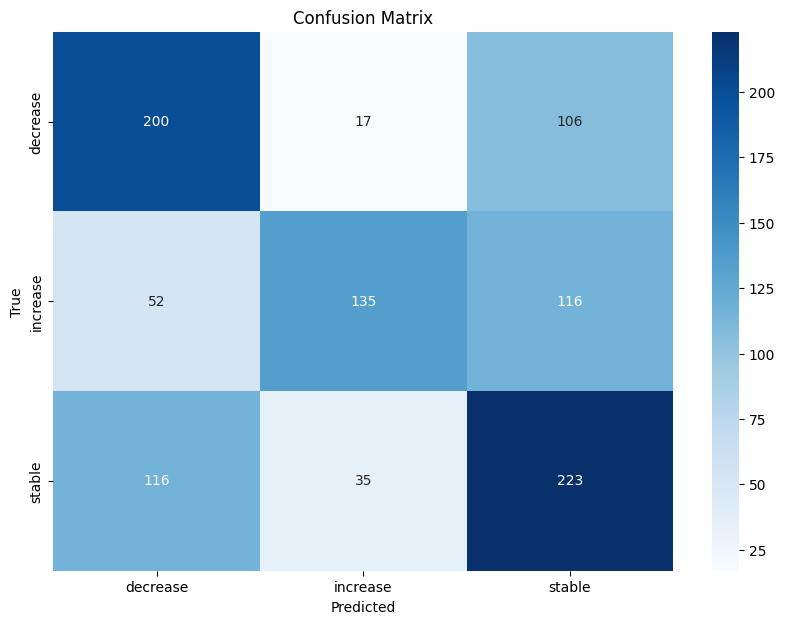

              precision    recall  f1-score   support

    decrease       0.54      0.62      0.58       323
    increase       0.72      0.45      0.55       303
      stable       0.50      0.60      0.54       374

    accuracy                           0.56      1000
   macro avg       0.59      0.55      0.56      1000
weighted avg       0.58      0.56      0.56      1000



In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('bayesian_network_data.csv')

# One-hot encode categorical variables
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(df[['Interest Rates', 'Economic Indicators']])
encoded_labels = encoder.fit_transform(df[['Stock Prices']])

# Define the neural network
model = Sequential([
    Dense(10, input_shape=(encoded_features.shape[1],), activation='relu'),
    Dense(10, activation='relu'),
    Dense(encoded_labels.shape[1], activation='softmax')  # Output layer with softmax activation for classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(encoded_features, encoded_labels, epochs=50, batch_size=32, validation_split=0.2)

# Make predictions on the entire dataset
predictions = model.predict(encoded_features)

# Convert predictions from probabilities to class labels
predicted_classes = encoder.inverse_transform(predictions)

# Convert true labels from one-hot encoded format to class labels
true_classes = encoder.inverse_transform(encoded_labels)

# Convert true and predicted labels to 1D arrays for confusion matrix
true_classes_1d = true_classes.flatten()
predicted_classes_1d = predicted_classes.flatten()

# Generate confusion matrix
conf_matrix = confusion_matrix(true_classes_1d, predicted_classes_1d, labels=encoder.categories_[0])

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(true_classes_1d, predicted_classes_1d, target_names=encoder.categories_[0]))

### K-L Divergence

In [19]:
import pandas as pd
import numpy as np
from scipy.stats import entropy

# Load the data
data = pd.read_csv('predicted_bayesian_network_data.csv')

# Display the first few rows of the data to confirm the structure
print(data.head())

# Compute the probability distributions for the stock prices
prob_bn = data['Stock Prices'].value_counts(normalize=True)
prob_nn = data['Predicted Stock Prices'].value_counts(normalize=True)

# Align the distributions so they have the same index
prob_bn, prob_nn = prob_bn.align(prob_nn, fill_value=0)

# Compute the KL divergence
kl_divergence = entropy(prob_bn, prob_nn)

# Interpret the KL divergence value
if kl_divergence < 0.5:
    interpretation = "The distributions are quite similar. The NN has successfully managed to capture the variable associations."
elif kl_divergence > 0.5:
    interpretation = "The distributions are significantly different. The NN was unable to capture the variable associations."

# Display the KL divergence
print(f"KL Divergence: {kl_divergence}")
# Display the KL divergence interpretation
print(f"Interpretation: {interpretation}")

  Interest Rates Economic Indicators Stock Prices Predicted Stock Prices
0         medium             average       stable                 stable
1            low             average     decrease               decrease
2           high             average       stable                 stable
3            low                 bad     increase               decrease
4            low                 bad     decrease               decrease
KL Divergence: 0.046183488168564324
Interpretation: The distributions are quite similar. The NN has successfully managed to capture the variable associations.


### BIC & K-L Divergence (incomplete)

In [ ]:
pip install pgmpy

In [ ]:
pip install pgmpy pandas scipy

In [17]:
import pandas as pd
from pgmpy.estimators import HillClimbSearch, BicScore
from pgmpy.models import BayesianNetwork
from pgmpy.inference import VariableElimination
from scipy.stats import entropy
import numpy as np

# Load the combined dataset
data_path = 'predicted_bayesian_network_data.csv'
data = pd.read_csv(data_path)

# Function to learn BN structure using BIC
def learn_bn_structure(data, columns):
    hc = HillClimbSearch(data[columns])
    best_model = hc.estimate(scoring_method=BicScore(data[columns]))
    bn_model = BayesianNetwork(best_model.edges())
    bn_model.fit(data[columns])
    return bn_model

# Learn the BN structure for the original dataset
original_bn = learn_bn_structure(data, ["Interest Rates", "Economic Indicators", "Stock Prices"])

# Learn the BN structure for the predicted dataset
predicted_bn = learn_bn_structure(data, ["Interest Rates", "Economic Indicators", "Predicted Stock Prices"])

# Print the learned structures
print("Original BN Structure:", original_bn.edges())
print("Predicted BN Structure:", predicted_bn.edges())

# Function to compute KL divergence
def compute_kl_divergence(bn1, bn2, evidence_columns, target_column):
    inference_bn1 = VariableElimination(bn1)
    inference_bn2 = VariableElimination(bn2)

    kl_div = 0
    count = 0
    for idx, row in data.iterrows():
        evidence = {col: row[col] for col in evidence_columns}
        try:
            q_dist = inference_bn1.query(variables=[target_column], evidence=evidence).values
            p_dist = inference_bn2.query(variables=[target_column], evidence=evidence).values
            kl_div += entropy(p_dist, q_dist)
            count += 1
        except:
            continue

    return kl_div / count if count > 0 else np.inf

# Calculate KL divergence between the original and predicted BN structures
kl_div = compute_kl_divergence(original_bn, predicted_bn, ["Interest Rates", "Economic Indicators"], "Stock Prices")
print("Kullback-Leibler Divergence:", kl_div)

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

Original BN Structure: [('Interest Rates', 'Economic Indicators'), ('Stock Prices', 'Interest Rates'), ('Stock Prices', 'Economic Indicators')]
Predicted BN Structure: [('Economic Indicators', 'Interest Rates'), ('Predicted Stock Prices', 'Interest Rates'), ('Predicted Stock Prices', 'Economic Indicators')]
Kullback-Leibler Divergence: inf
